In [ ]:
# TensorFlow and tf.keras
# SE OVER HVA VI EGENTLIG TRENGER
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical   
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Add channel dimension and normalize pixel values
train_images = train_images[:,:,:,np.newaxis]/255.0
test_images = test_images[:,:,:,np.newaxis]/255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [73]:

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Changed 63 to 64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with a reasonable learning rate
eta = 0.001  
adam = optimizers.legacy.Adam(learning_rate=eta)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# IMPLEMENT EARLY STOPPING?
'''
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_split=0.2,  # Use 20% of training data for validation
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=2
)
'''


"\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)\n\n# Train the model\nhistory = model.fit(\n    train_images, train_labels,\n    validation_split=0.2,  # Use 20% of training data for validation\n    batch_size=batch_size,\n    epochs=epochs,\n    callbacks=[early_stopping],\n    verbose=2\n)\n"

In [74]:
# Train the model
# Validation split: use 20% of training data as validation set
history = model.fit(train_images, train_labels, validation_split = 0.2, batch_size=64,  
                    epochs=10, validation_data=(test_images, test_labels))

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4873 - accuracy: 0.8243 - val_loss: 0.4058 - val_accuracy: 0.8484
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3247 - accuracy: 0.8831 - val_loss: 0.3555 - val_accuracy: 0.8691
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2766 - accuracy: 0.8980 - val_loss: 0.2943 - val_accuracy: 0.8972
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2478 - accuracy: 0.9092 - val_loss: 0.2766 - val_accuracy: 0.8989
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2227 - accuracy: 0.9165 - val_loss: 0.2622 - val_accuracy: 0.9040
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2007 - accuracy: 0.9254 - val_loss: 0.2670 - val_accuracy: 0.9042
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1792 - accuracy: 0.9336 - val_loss: 0.2640 - val_accuracy: 0.9069
Epoch

/var/folders/yw/7xk1wysd3kvfs513n3xmpn340000gn/T/ipykernel_29890/1701416991.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


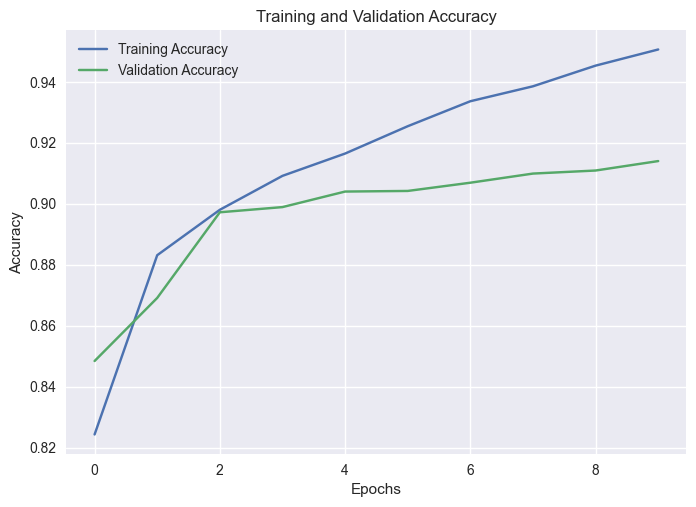

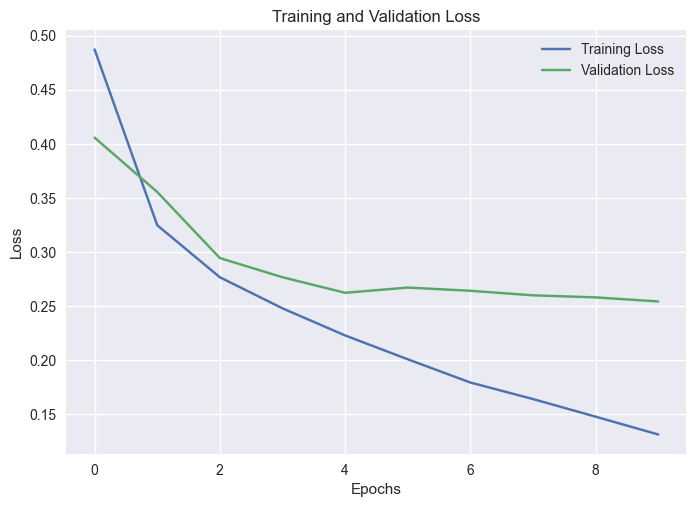

In [75]:
# Set Seaborn style
sns.set_theme(style="darkgrid")
plt.style.use('seaborn')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()